<a href="https://colab.research.google.com/github/finddme/NLP_kruni-/blob/master/%234_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the sumarization tool
- 고려대학교 일반대학원 교육학과 송은정

## 1. 추출적 요약(extractive summarization): Python Gensim - TextRank 도구 소개

### 개요
- 추출적 요약(extractive summarization): 원문에서 중요한 핵심 문장 또는 단어구를 몇 개 뽑아서 이들로 구성된 요약문을 만드는 방법
- 이미 존재하는 문장이나 단어구로만 구성하므로 모델의 언어 표현 능력이 제한됨

- 텍스트랭크(TextRank) 요약기 데모: https://summariz3.herokuapp.com
- 트와이스, 빌보드 200 첫 진입…의미 있는 성과: http://www.xportsnews.com/?ac=article_view&entry_id=1282395
![3줄요약](https://i.imgur.com/zsKXcaz.png)

### Python Gensim 라이브러리의 summarization.summarizer 모듈 활용

In [ ]:
from gensim.summarization.summarizer import summarize

### TextRank 변형 알고리즘을 통해 문장 순위에 기반하여 요약을 수행하는 예시



In [ ]:
text_en = '''Rice Pudding - Poem by Alan Alexander Milne
What is the matter with Mary Jane?
She's crying with all her might and main,
And she won't eat her dinner - rice pudding again -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
I've promised her dolls and a daisy-chain,
And a book about animals - all in vain -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
She's perfectly well, and she hasn't a pain;
But, look at her, now she's beginning again! -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
I've promised her sweets and a ride in the train,
And I've begged her to stop for a bit and explain -
What is the matter with Mary Jane?
What is the matter with Mary Jane?
She's perfectly well and she hasn't a pain,
And it's lovely rice pudding for dinner again!
What is the matter with Mary Jane?''' 

In [ ]:
summarize(text_en).split('\n')

["And she won't eat her dinner - rice pudding again -",
 "I've promised her dolls and a daisy-chain,",
 "I've promised her sweets and a ride in the train,",
 "And it's lovely rice pudding for dinner again!"]

In [ ]:
text_kr = '''
윤동주 - 별 헤는 밤

계절이 지나가는 하늘에는
가을로 가득 차 있습니다.

나는 아무 걱정도 없이
가을 속의 별들을 다 헤일 듯합니다.

가슴 속에 하나 둘 새겨지는 별을
이제 다 못 헤는 것은
쉬이 아침이 오는 까닭이요,
내일 밤이 남은 까닭이요,
아직 나의 청춘이 다하지 않은 까닭입니다.

별 하나에 추억과
별 하나에 사랑과
별 하나에 쓸쓸함과
별 하나에 동경(憧憬)과
별 하나에 시와
별 하나에 어머니, 어머니

어머님, 나는 별 하나에 아름다운 말 한마디씩 불러봅니다.
소학교 때 책상을 같이 했던 아이들의 이름과 패, 경, 옥 이런
이국 소녀들의 이름과 벌써 아기 어머니된 계집애들의 이름과,
가난한 이웃 사람들의 이름과, 비둘기, 강아지, 토끼, 노새, 노루,
‘프랑시스 잠', ‘라이너 마리아 릴케', 이런 시인의 이름을 불러 봅니다.

이네들은 너무나 멀리 있습니다.
별이 아스라이 멀듯이.

어머님,
그리고, 당신은 멀리 북간도에 계십니다. 

나는 무엇인지 그리워서
이 많은 별빛이 내린 언덕 위에
내 이름자를 써 보고,
흙으로 덮어 버리었습니다.

딴은 밤을 새워 우는 벌레는
부끄러운 이름을 슬퍼하는 까닭입니다.

그러나, 겨울이 지나고 나의 별에도 봄이 오면,
무덤 위에 파란 잔디가 피어나듯이
내 이름자 묻힌 언덕 위에도
자랑처럼 풀이 무성할 거외다
'''

In [ ]:
summarize(text_kr).split('\n')

['별 하나에 추억과',
 '별 하나에 쓸쓸함과',
 '별 하나에 시와',
 '별 하나에 시와',
 '어머님, 나는 별 하나에 아름다운 말 한마디씩 불러봅니다.',
 '부끄러운 이름을 슬퍼하는 까닭입니다.']

## 2. 추상적 요약(abstractive summarization): Python Tensorflow (Keras) - Seq2seq + Attention 도구 소개

### 개요
- 추상적 요약(abstractive summarization): 원문에 없던 문장이라도 핵심 문맥을 반영한 새로운 문장을 생성해서 원문을 요약하는 방법
- 지도 학습: 원문+요약문 의 데이터가 있어야 함

### 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

- 아마존 리뷰 데이터: https://www.kaggle.com/snap/amazon-fine-food-reviews

#### 데이터 로딩

In [ ]:
# 아마존 리뷰 데이터에서 5만 행(rows)만 utf-8 csv 형식으로 저장하여 실습에 활용
data = pd.read_csv("https://raw.githubusercontent.com/songej/data/master/Reviews_50K.csv")
print('전체 리뷰 개수 :',(len(data)))

전체 리뷰 개수 : 50000


In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data = data[['Text','Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [ ]:
# 랜덤으로 10개의 샘플 출력
data.sample(10)

,Text,Summary
34958,one favorite jerkys like hickory best like jer...,sostoken one of my favorite jerky eostoken
30185,one best gf bread mixes available use bake sor...,sostoken great gf mix eostoken
39109,corgi loves great unfortunately kind warm kelp...,sostoken dog loves these eostoken
11869,use storage drawer assorted cups keurig sits a...,sostoken cup storage stand for coffee brewer e...
6590,love things unlike products actually tastes re...,sostoken awesome eostoken
25401,taste synthetic big difference mashing potatoe...,sostoken strange taste eostoken
414,like oreo oreo cakester got try double stuff c...,sostoken double the pleasure eostoken
42513,like delivered free shipping two flavors per s...,sostoken happy puppy dogs eostoken
47481,bought like girl scout cookies love kind stale...,sostoken okay eostoken
18121,great taste excellent mixing chocolate protein...,sostoken great for shakes eostoken


#### 데이터 정제

In [ ]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 46254
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 38946


In [ ]:
# text 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['Text'], inplace=True)

In [ ]:
print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [ ]:
# Null 값을 가진 샘플 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 46253


- 사전 생성: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
- 동일한 의미를 가졌지만 스펠링이 다른 단어들을 정규화

In [ ]:
# 전처리 함수 내 사용
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

- NLTK의 불용어 활용

In [ ]:
import nltk
nltk.download('stopwords')
# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
불용어 개수 : 179
{'by', "aren't", 'been', 'weren', 'out', 'being', 'between', 'd', 'herself', "hasn't", 'it', 'them', 'ours', 'into', "didn't", 'any', "mightn't", 'only', 'itself', "should've", 'both', 'against', 'those', 'at', 'i', 't', 'few', 'am', 'once', 'other', 'does', 'over', 'each', 'doing', 'where', 'hasn', 's', 'shan', 'is', "don't", 'had', "shouldn't", 'wasn', 'hadn', 'why', "needn't", 'this', 'are', 'yourself', 'be', 'my', "isn't", 'themselves', 'their', 'isn', "wouldn't", 'what', 'who', 'off', 'in', 'because', 'hers', 'during', 'on', 'below', 'than', 're', 'again', 'you', 'down', 'more', 'has', 'do', 'wouldn', 'yours', 'or', 'most', 'himself', 'ain', 'its', 'just', 'doesn', "it's", "weren't", 'about', 'myself', 'she', 'as', 'above', 'him', "she's", 'with', "wasn't", 'they', 'don', "won't", 've', "mustn't", "you'll", 'we', 'these', 'yourselves', 'his', 'before', 'your'

In [ ]:
# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my husband (and myself) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [ ]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [ ]:
# Text 열 전처리
clean_text = []
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [ ]:
# Summary 열 전처리
clean_summary = []
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [ ]:
# 전처리 후의 결과를 다시 데이터프레임에 저장
data['Text'] = clean_text
data['Summary'] = clean_summary

In [ ]:
# 길이가 공백인 샘플은 NULL 값으로 변환
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Text        0
Summary    37
dtype: int64


In [ ]:
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 46216


텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 863
텍스트의 평균 길이 : 37.86762160290808
요약의 최소 길이 : 1
요약의 최대 길이 : 25
요약의 평균 길이 : 3.97788644625238


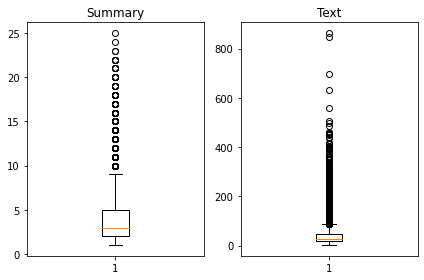

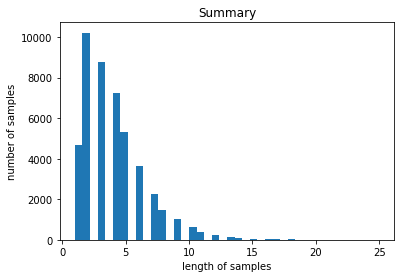

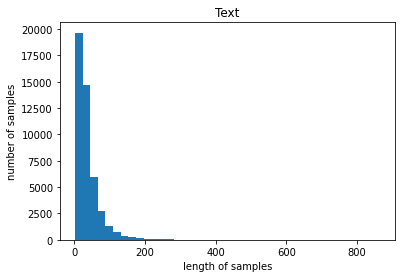

In [ ]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
text_max_len = 50
summary_max_len = 8

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
below_threshold_len(text_max_len, data['Text'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7838410939934222


In [ ]:
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9438722520339277


In [ ]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 34893


In [ ]:
data.head()

,Text,Summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not as advertised
2,confection around centuries light pillowy citr...,delight says it all
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price wide assortment yummy ...,great taffy


In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['Summary'] = data['Summary'].apply(lambda x : 'sostoken '+ x + ' eostoken')
data.head()

,Text,Summary
0,bought several vitality canned dog food produc...,sostoken good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,sostoken not as advertised eostoken
2,confection around centuries light pillowy citr...,sostoken delight says it all eostoken
3,looking secret ingredient robitussin believe f...,sostoken cough medicine eostoken
4,great taffy great price wide assortment yummy ...,sostoken great taffy eostoken


In [ ]:
Text_data = list(data['Text'])
Summary_data = list(data['Summary'])

#### 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Text_data, Summary_data, test_size=0.2, random_state=0, shuffle=True)

print('훈련 데이터의 개수 :', len(X_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(X_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 27914
훈련 레이블의 개수 : 27914
테스트 데이터의 개수 : 6979
테스트 레이블의 개수 : 6979


#### 데이터 인코딩

In [ ]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 23241
등장 빈도가 6번 이하인 희귀 단어의 수: 17275
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5966
단어 집합에서 희귀 단어의 비율: 74.32984811324815
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.757614738386469


In [ ]:
src_vocab = 5000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(X_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
X_train = src_tokenizer.texts_to_sequences(X_train) 
X_test = src_tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:5])

[[148, 76, 2945, 443, 1125, 930, 970, 66, 56, 144, 3992, 348, 194, 13, 66, 76, 56, 968, 72, 1240, 478, 795, 36, 13, 66, 1085, 2512, 641, 348, 369, 3023, 36, 12, 56, 3526, 3993, 613, 206, 5, 4592, 16, 1187, 849, 1188], [139, 148, 3397, 2, 93, 159, 270, 329, 74, 109, 10, 41, 329, 114, 59, 434], [14, 684, 1733, 115, 249, 377, 406, 983, 9, 120, 438, 94, 4, 1733, 2946, 80, 3291, 411, 501, 29, 92, 41, 97, 69, 53, 684, 115, 101], [1153, 3398, 42, 2622, 48, 19, 131, 2622, 371, 1, 222, 1016, 145, 275, 1949, 13, 1160, 384, 10, 41, 274, 888, 1905, 30, 22, 72, 3668, 108, 10, 96, 354, 30, 20, 369], [105, 129, 780, 44, 777]]


In [ ]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(y_train)

In [ ]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7373
등장 빈도가 5번 이하인 희귀 단어의 수: 5802
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 1571
단어 집합에서 희귀 단어의 비율: 78.69252678692527
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.553538524988192


In [ ]:
tar_vocab = 1500
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(y_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
y_train = tar_tokenizer.texts_to_sequences(y_train) 
y_test = tar_tokenizer.texts_to_sequences(y_test) 

In [ ]:
print(y_train[:5])

[[1, 24, 2], [1, 13, 2], [1, 17, 10, 58, 35, 2], [1, 259, 861, 434, 2], [1, 526, 14, 237, 157, 547, 2]]


#### 빈 샘플 제거

In [ ]:
drop_train = [index for index, sentence in enumerate(y_train) if len(sentence) == 2]
drop_test = [index for index, sentence in enumerate(y_test) if len(sentence) == 2]

In [ ]:
print('훈련 데이터의 개수 :', len(X_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(X_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 27914
훈련 레이블의 개수 : 27914
테스트 데이터의 개수 : 6979
테스트 레이블의 개수 : 6979


In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(X_train))
print('훈련 레이블의 개수 :',len(y_train))
print('테스트 데이터의 개수 :',len(X_test))
print('테스트 레이블의 개수 :',len(y_test))

훈련 데이터의 개수 : 27141
훈련 레이블의 개수 : 27141
테스트 데이터의 개수 : 6763
테스트 레이블의 개수 : 6763


#### 데이터 패딩

In [ ]:
X_train = pad_sequences(X_train, maxlen = text_max_len, padding='post')
X_test = pad_sequences(X_test, maxlen = text_max_len, padding='post')
y_train = pad_sequences(y_train, maxlen = summary_max_len, padding='post')
y_test = pad_sequences(y_test, maxlen = summary_max_len, padding='post')

### Seq2seq + Attention 을 통한 요약 모델 설계 및 훈련

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb = Embedding(tar_vocab, embedding_dim)(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [ ]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      640000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [ ]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      640000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:,1:] \
                  ,epochs=50, callbacks=[es], batch_size = 256, validation_data=([X_test, y_test[:,:-1]], \
                  y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/50
107/107 [==============================] - 62s 584ms/step - loss: 3.1123 - val_loss: 2.7809
Epoch 2/50
107/107 [==============================] - 62s 579ms/step - loss: 2.6943 - val_loss: 2.6580
Epoch 3/50
107/107 [==============================] - 61s 575ms/step - loss: 2.5984 - val_loss: 2.6043
Epoch 4/50
107/107 [==============================] - 61s 573ms/step - loss: 2.5170 - val_loss: 2.5391
Epoch 5/50
107/107 [==============================] - 62s 581ms/step - loss: 2.4221 - val_loss: 2.4775
Epoch 6/50
107/107 [==============================] - 62s 575ms/step - loss: 2.3251 - val_loss: 2.3646
Epoch 7/50
107/107 [==============================] - 62s 576ms/step - loss: 2.2474 - val_loss: 2.3122
Epoch 8/50
107/107 [==============================] - 62s 578ms/step - loss: 2.1844 - val_loss: 2.2894
Epoch 9/50
107/107 [==============================] - 62s 580ms/step - loss: 2.1302 - val_loss: 2.2738
Epoch 10/50
107/107 [==============================] - 62s 578ms/step - l

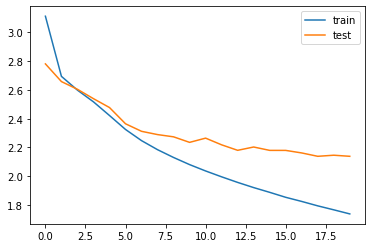

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Seq2seq + Attention 을 통한 요약 모델 평가

In [ ]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음
tar_vocab_size = 8

In [ ]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [ ]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb_layer = Embedding(tar_vocab, embedding_dim)

dec_emb2 = dec_emb_layer(decoder_inputs) 
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [ ]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)
    # <sos>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, tar_word_to_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""
    while not stop_condition: #stop_condition이 True가 될 때까지 루프 반복
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_tar_len):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트 합니다.
        target_seq = np.zeros((1, 1, tar_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 상태를 업데이트 합니다.
        states_value = [h, c]

    return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [ ]:
for i in range(1000, 1010):
    print("원문 : ",seq2text(X_test[i]))
    print("실제 요약문 :",seq2summary(y_test[i]))
    # print("예측 요약문 :",decode_sequence(X_test[i].reshape(1, text_max_len)))
    print("\n")

원문 :  coffee become favorite beans variety rich flavor may strong day coffee drinker right couple cups morning 
실제 요약문 : excellent coffee 


원문 :  others mentioned little guys salty dry crunchy bits baked cheese like cheese edge frozen pizza burns baking liked flavors taste like cheese unusual flavors seem saltier artificial tasting always little baked bits cheese aluminum foil baking give try 
실제 요약문 : the regular flavors are good 


원문 :  got hubby son day planning since love licorice test course nice touch grainy opinion still delish also individually wrapped great since going candy dish hubby desk work pleased product around 
실제 요약문 : yummy 


원문 :  bought popcorn based reviews people wrote reviews must work popcorn popcorn good butter taste plus makes popcorn expensive would buy popcorn 
실제 요약문 : not so good popcorn 


원문 :  sorry dont eat mexican chinese made candies buy peppermint patties check labels folks dont food safety 
실제 요약문 : made in 


원문 :  ones tried best tasting easi